In [1]:
import igraph as ig
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('facebook_combined.txt',sep=' ',names = ['a','b'])

tuples = [tuple(x) for x in df.values]
G = ig.Graph.TupleList(tuples)

In [3]:
k = G.shell_index()
D = G.degree()

In [4]:
nodes = []
for x in G.vs.indices:
    nodes.append(x)

In [5]:
new = dict()
for i in range(1,max(k)+1):
    new[i] = [x for x in nodes if k[x] == i]

In [6]:
# returns cascading power i.e, number of nodes infected at the end of the process
def uic(G,seed):
    jst_inf = list(seed)
    infected = list(seed)
    itera = 0
    data = {}
    while(len(jst_inf) != 0): #breaks the loop when there are no nodes to move forward
        tmp = []
        for each in jst_inf:
            for each1 in G.neighbors(each): #gets the neighbor nodes for every node in jst_inf
                r = random.uniform(0,1) #generates a random number between [0,1)
                if r<0.5 and each1 not in infected and each1 not in tmp:
                    tmp.append(each1) #appends the node to tmp and infected when it satisfies the above if condition
                    infected.append(each1)
        jst_inf = list(tmp)
        #print(len(infected),len(jst_inf))
        itera = itera+1
        data[itera] = jst_inf
    return data#returns the number of infected nodes

In [31]:
#core nodes
cnodes = [x for x in nodes if k[x] == 115]
scnodes = random.sample(cnodes,k=5)

#pseudo core nodes
ps = [9,10,11,12,13]
nnode = [x for x in nodes if k[x] == 9 or k[x] == 10 or k[x] == 11 or k[x] == 12 or k[x] == 13]
pnodes = random.sample(nnode,k=5)

#nodes with high degree
hnode = [x for x in nodes if D[x] > 250]
shnode = random.sample(hnode,k=5)

#random nodes without core or pseudo core
randnode = [9,10,11,12,13,115]
selectNode = [x for x in nodes if k[x] not in randnode]
sNodes = random.sample(selectNode,k=5)

In [86]:
len(cnodes)

158

In [32]:
total_nodes = scnodes + pnodes + shnode + sNodes
shells = [k[x] for x in total_nodes]

In [33]:
def getData(nodes):
    newt = []
    for i in nodes:
        d = uic(G,[i])
        test = {}
        for i in d.keys():
            dum = []
            pdum = []
            hdum = []
            for j in d[i]:
                if j in new[115]:
                    dum.append(j)
                if j in nnode:
                    pdum.append(j)
                if j in hnode:
                    hdum.append(j)
            test[i] = (len(d[i]) - len(dum) - len(pdum),len(dum),len(pdum),len(hdum)) #(random nodes,core nodes,psuedo nodes,high degree nodes)
        newt.append(test)
        print(test)
    return newt

In [34]:
data = getData(total_nodes)

{1: (34, 77, 0, 1), 2: (151, 80, 4, 2), 3: (277, 0, 42, 1), 4: (721, 0, 91, 2), 5: (985, 0, 160, 1), 6: (390, 0, 103, 1), 7: (277, 0, 99, 0), 8: (159, 0, 63, 0), 9: (100, 0, 20, 0), 10: (42, 0, 12, 0), 11: (9, 0, 0, 0), 12: (0, 0, 0, 0)}
{1: (26, 68, 0, 2), 2: (349, 89, 31, 1), 3: (225, 0, 45, 2), 4: (958, 0, 139, 2), 5: (732, 0, 148, 1), 6: (531, 0, 129, 0), 7: (187, 0, 65, 0), 8: (35, 0, 7, 0), 9: (105, 0, 17, 0), 10: (34, 0, 13, 0), 11: (1, 0, 0, 0), 12: (0, 0, 0, 0)}
{1: (9, 64, 0, 1), 2: (318, 93, 33, 2), 3: (200, 0, 27, 1), 4: (528, 0, 46, 3), 5: (1070, 0, 189, 0), 6: (542, 0, 135, 1), 7: (259, 0, 96, 0), 8: (220, 0, 63, 0), 9: (44, 0, 3, 0), 10: (4, 0, 0, 0), 11: (0, 0, 0, 0)}
{1: (12, 68, 0, 2), 2: (348, 89, 37, 1), 3: (256, 0, 27, 1), 4: (836, 0, 101, 3), 5: (845, 0, 191, 1), 6: (543, 0, 138, 0), 7: (129, 0, 61, 0), 8: (7, 0, 4, 0), 9: (3, 0, 0, 0), 10: (23, 0, 3, 0), 11: (80, 0, 13, 0), 12: (46, 0, 19, 0), 13: (12, 0, 0, 0), 14: (0, 0, 0, 0)}
{1: (29, 66, 1, 1), 2: (381, 91, 

## Frequency plot for Degree

In [87]:
d = {'Nodes':nodes,'Degree':D}
deg_df = pd.DataFrame(d)

In [88]:
deg_df

,Nodes,Degree
0,0,347
1,1,17
2,2,10
3,3,17
4,4,10
...,...,...
4034,4034,2
4035,4035,1
4036,4036,2
4037,4037,4


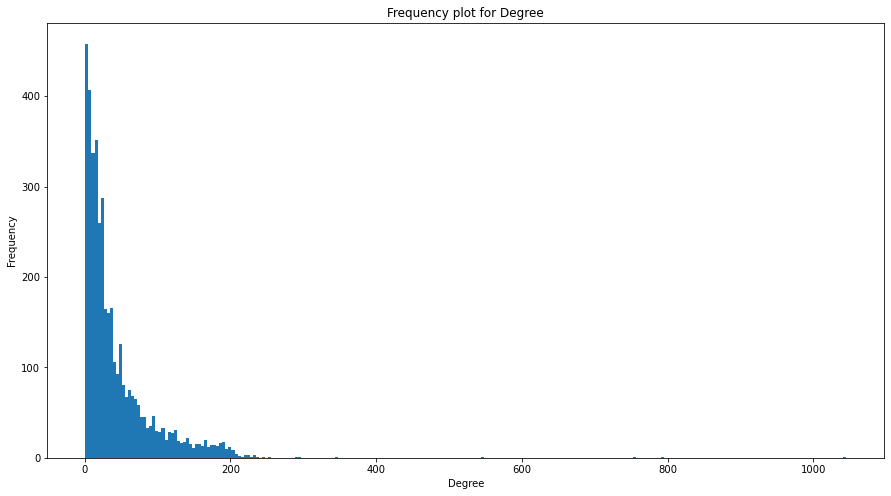

In [93]:
plt.figure(figsize=(15,8),)
deg_df['Degree'].hist(bins=250,grid=False)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Frequency plot for Degree')
plt.savefig('Frequency_plot_for_Degree.jpg')

## Plotting for cascading power per iteration

In [63]:
df = pd.read_excel('test.xlsx')
length = (len(df.columns)-2)//4

In [67]:
def get_plot(num):    

    trivial = [df.iloc[num]['a{}'.format(i)] for i in range(1,length+1)]
    core = [df.iloc[num]['b{}'.format(i)] for i in range(1,length+1)]
    pcore = [df.iloc[num]['c{}'.format(i)] for i in range(1,length+1)]
    hdnodes = [df.iloc[num]['d{}'.format(i)] for i in range(1,length+1)]
    
    cummu = []

    for i in range(length):
        cummu.append(trivial[i]+core[i]+pcore[i])

    d = {'trivial':trivial,'core':core,'psuedo-core':pcore,'high_degree':hdnodes,'cumulative':cummu}
    new_df = pd.DataFrame(d)

    new_df['periphery_cumulative'] = new_df['trivial'].cumsum()
    new_df['core_cumulative'] = new_df['core'].cumsum()
    new_df['psuedocore_cumulative'] = new_df['psuedo-core'].cumsum()
    new_df['highdegree_cumulative'] = new_df['high_degree'].cumsum()
    new_df['cascadingpower_cumulative'] = new_df['cumulative'].cumsum()

    fig = plt.figure(figsize=(15,7))
    plt.xlabel('iteration number')
    plt.ylabel('infected nodes')

    plt.title('Node {}'.format(df.iloc[num]['nodes'])+', Shell number {}'.format(df.iloc[num]['shell_number']))
    
    for x in ['periphery_cumulative','core_cumulative', 'psuedocore_cumulative','highdegree_cumulative','cascadingpower_cumulative']:
        plt.plot(new_df[x],label=x)

    plt.legend()
    
    return fig

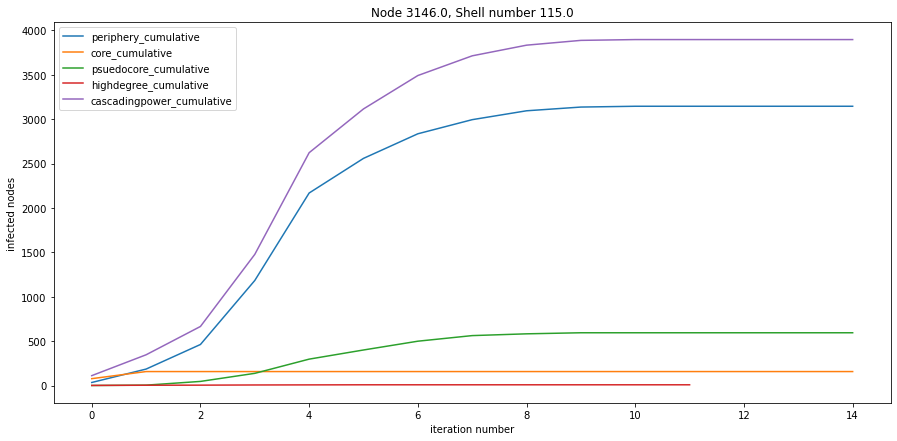

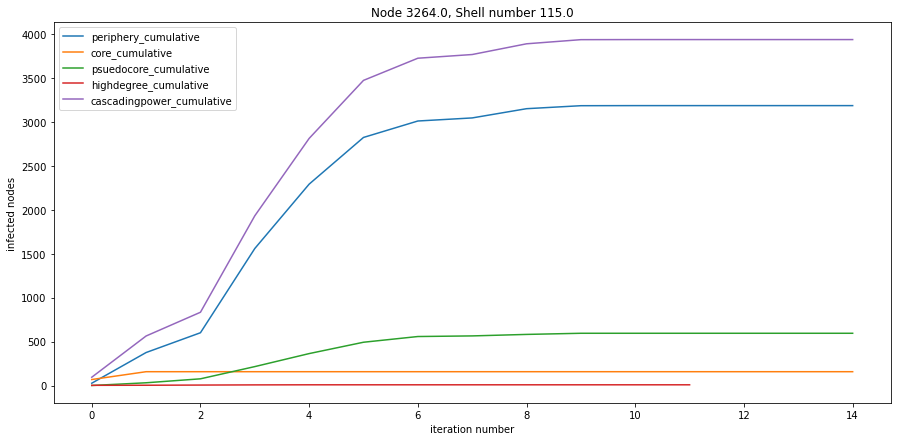

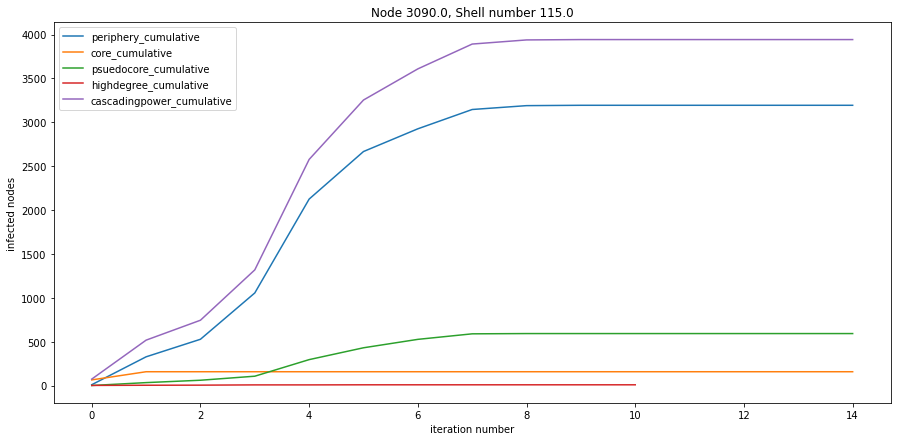

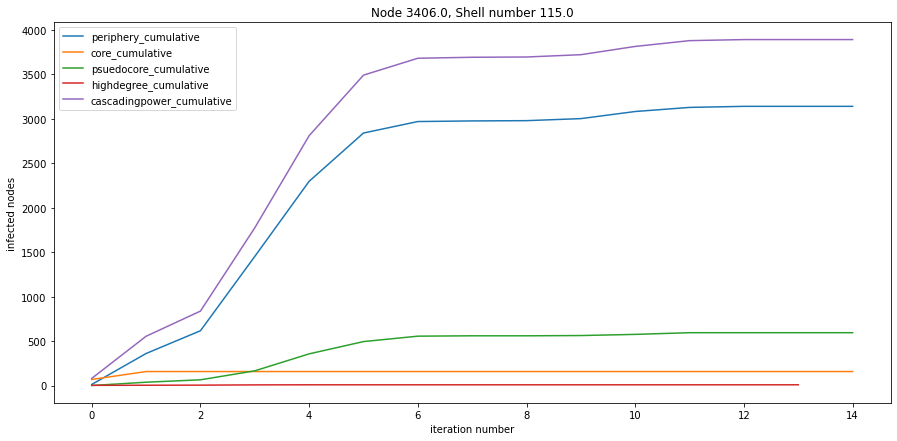

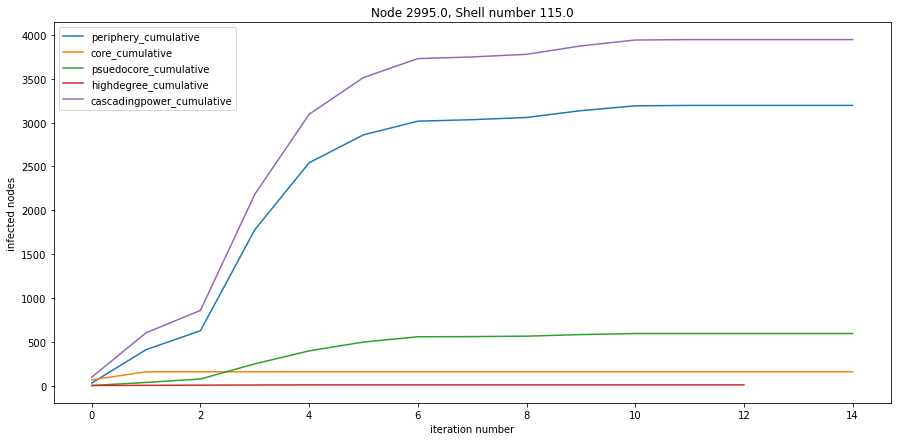

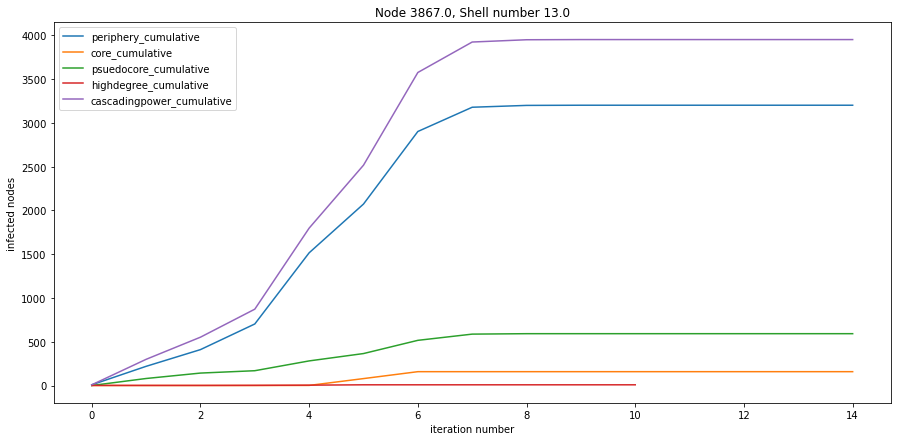

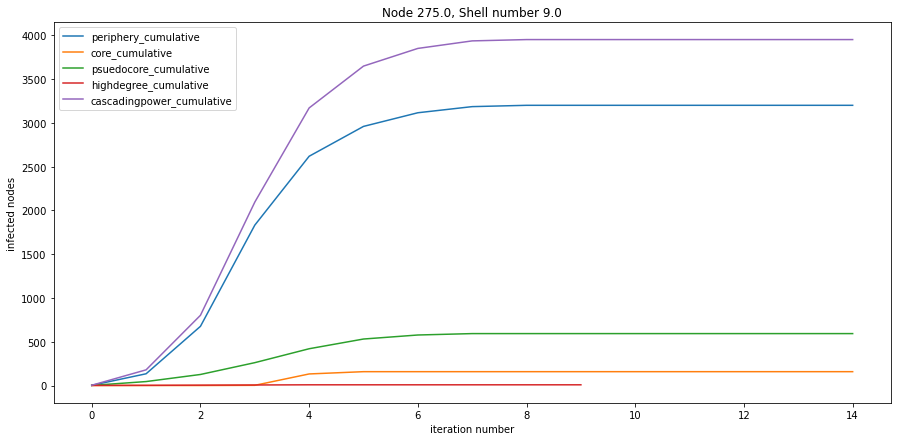

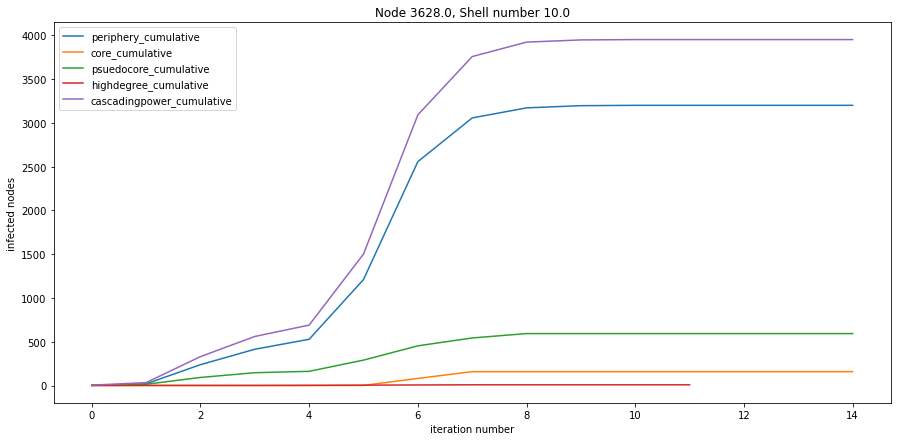

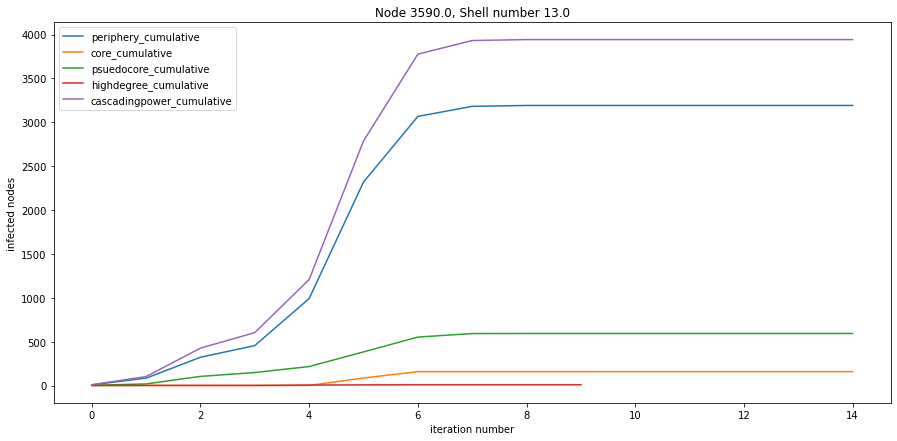

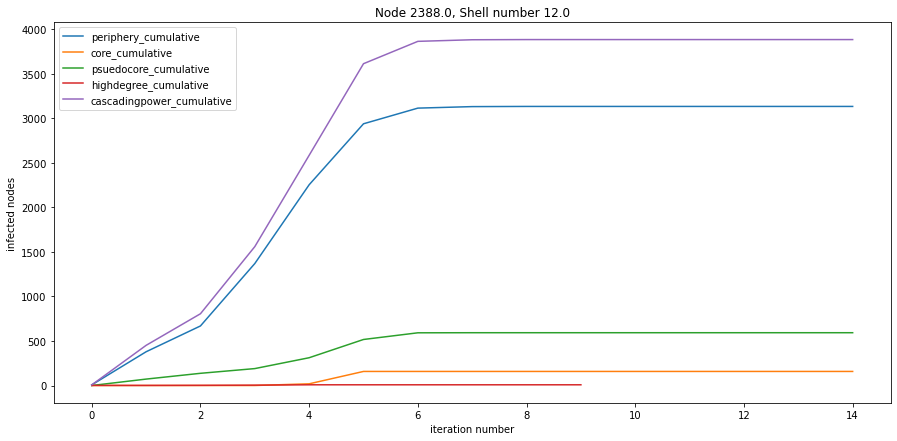

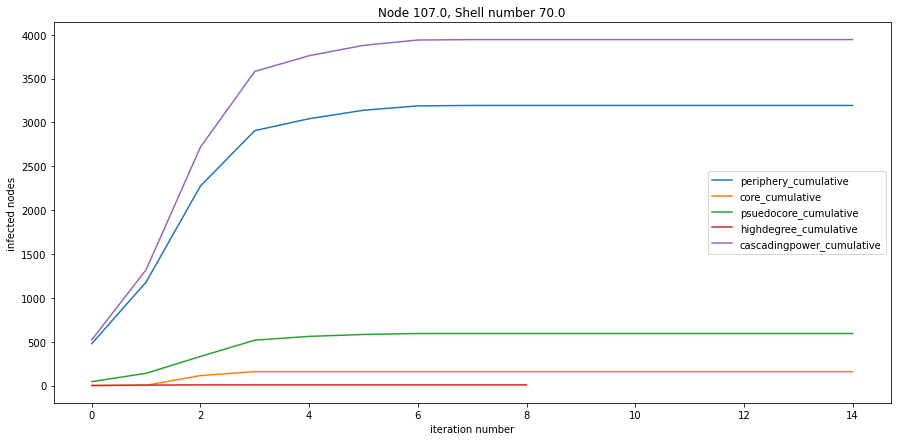

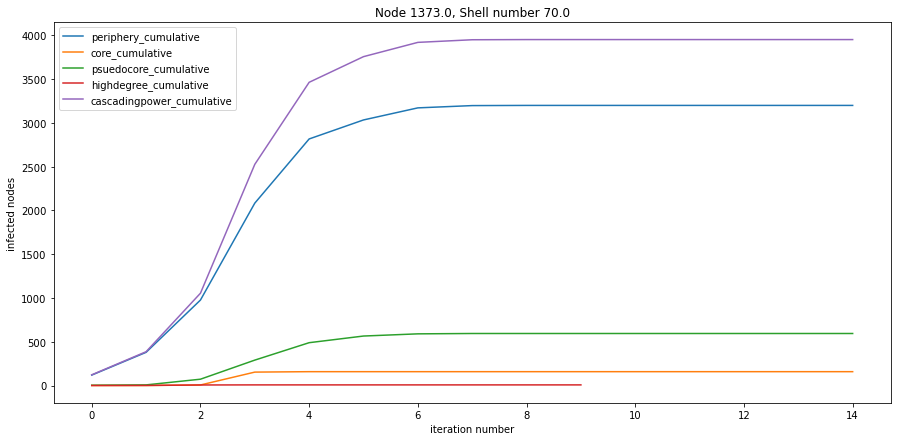

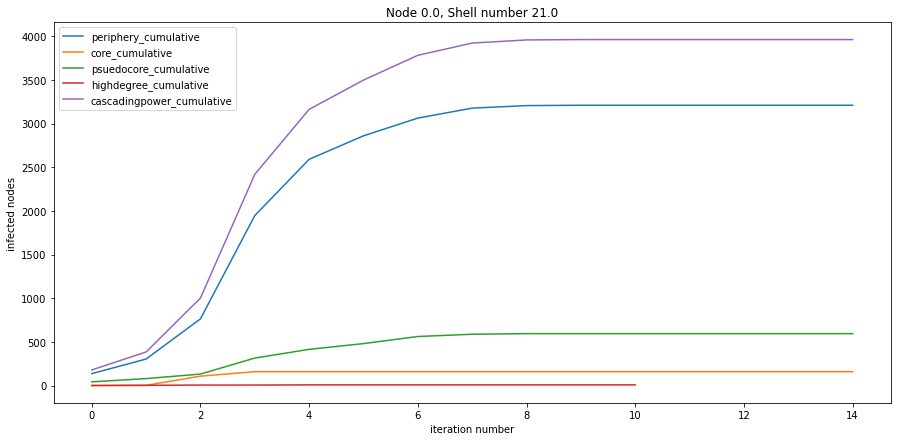

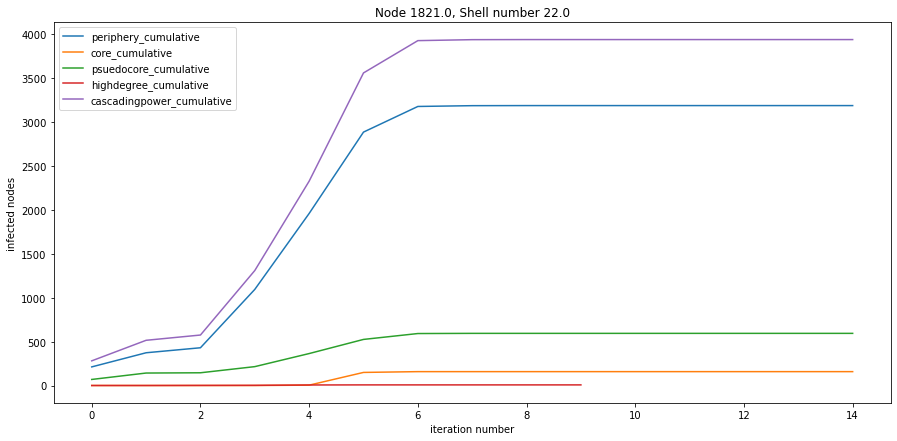

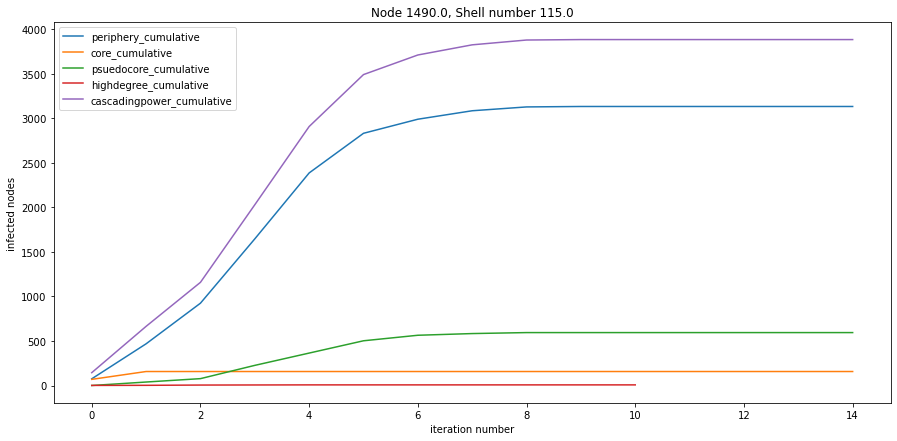

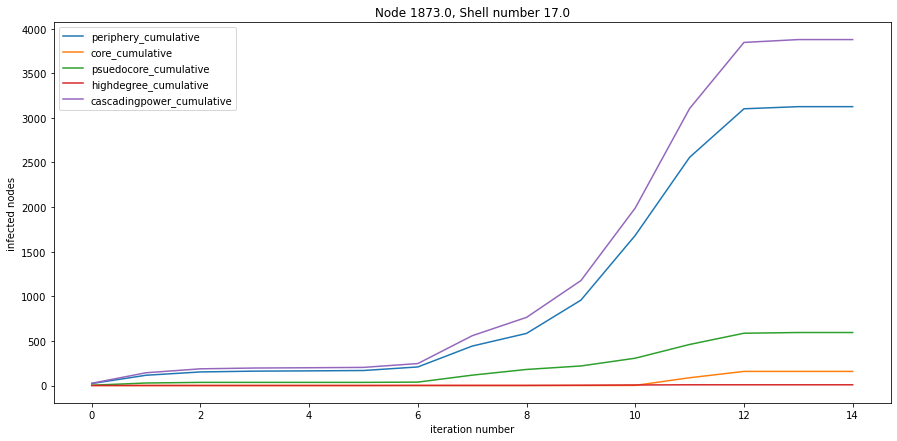

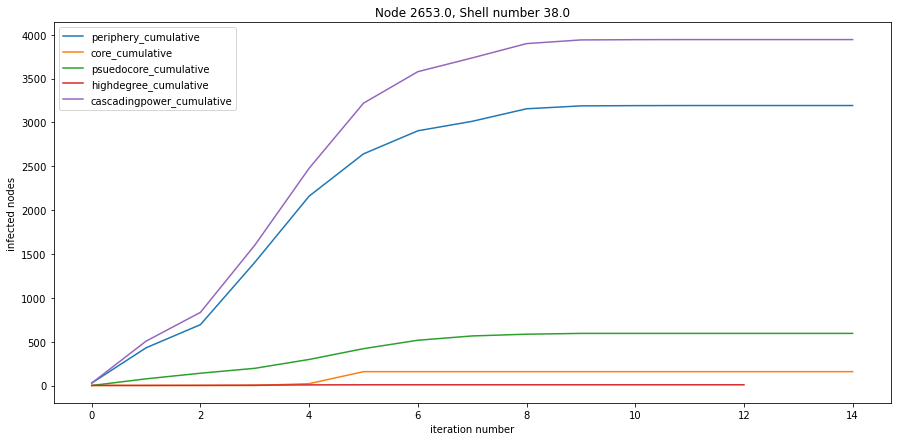

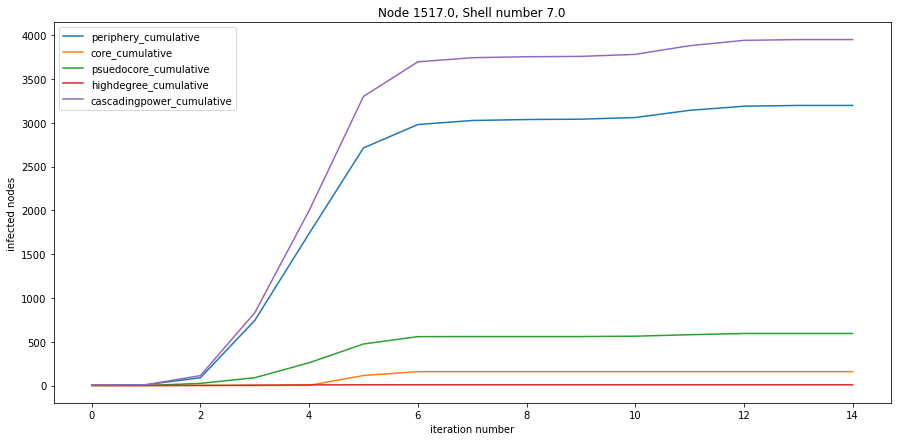

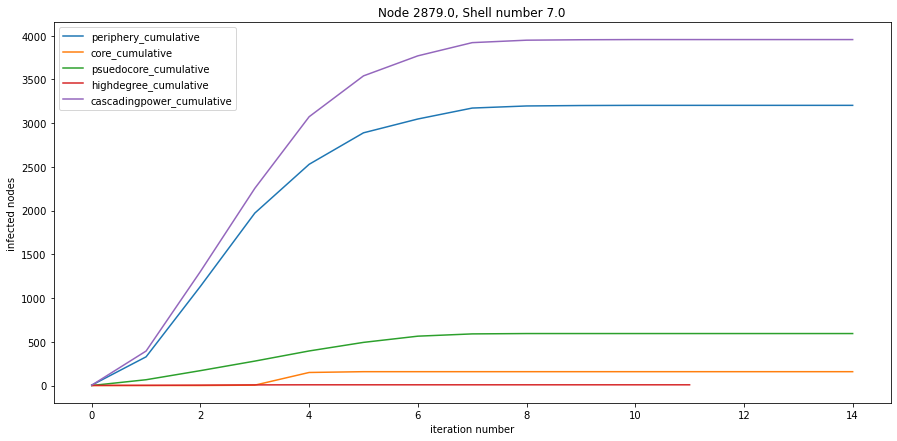

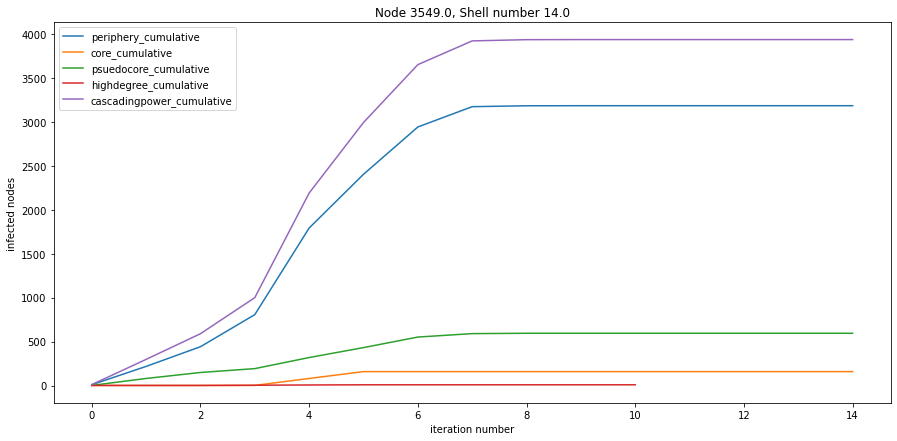

In [94]:
for i in range(20):
    man = get_plot(i)
    man.savefig("result{}.jpg".format(i))

## dataframe and stuff

In [35]:
df = pd.DataFrame(data)

In [36]:
df = df.applymap(lambda x: (0,0,0) if x is np.nan else x)

In [37]:
df_copy = df.copy()

In [38]:
length = len(df.columns)

In [40]:
for i in df.columns:
    df_copy[['a{}'.format(i),'b{}'.format(i),'c{}'.format(i),'d{}'.format(i)]] = pd.DataFrame(df[i].tolist(), index=df.index)

In [43]:
x_col = ['a{}'.format(i) for i in range(1,length+1)]
y_col = ['b{}'.format(i) for i in range(1,length+1)]
z_col = ['c{}'.format(i) for i in range(1,length+1)]
w_col = ['d{}'.format(i) for i in range(1,length+1)]

In [45]:
x_data = df_copy[x_col+y_col+z_col+w_col]

x_data['nodes'] = total_nodes
x_data['shell_number'] = shells

D:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [46]:
cols = ['nodes','shell_number']+x_col+y_col+z_col+w_col

In [47]:
final_data = x_data[cols]

In [54]:
final_data.to_excel('test.xlsx')